# Multiple Linear Regression
## Aditya Bagad

### Import the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Read the datatset

[Dataset Source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

In [2]:
dataFrame = pd.read_csv('MY2019 Fuel Consumption Ratings.csv')

In [3]:
dataFrame.head()

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY,FUEL CONSUMPTION HWY,FUEL CONSUMPTION COMB,FUEL CONSUMPTION COMB.1,CO2 EMISSIONS,CO2 RATING,SMOG RATING
0,2019,ACURA,ILX,COMPACT,2.4,4,AM8,Z,9.9,7.0,8.6,33,199,6,3
1,2019,ACURA,MDX SH-AWD,SUV - SMALL,3.5,6,AS9,Z,12.2,9.0,10.8,26,252,4,3
2,2019,ACURA,MDX SH-AWD A-SPEC,SUV - SMALL,3.5,6,AS9,Z,12.2,9.5,11.0,26,258,4,3
3,2019,ACURA,MDX HYBRID AWD,SUV - SMALL,3.0,6,AM7,Z,9.1,9.0,9.0,31,210,5,3
4,2019,ACURA,NSX,TWO-SEATER,3.5,6,AM9,Z,11.1,10.8,11.0,26,261,4,3


In [4]:
dataFrame.describe()

,MODEL YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION CITY,FUEL CONSUMPTION HWY,FUEL CONSUMPTION COMB,FUEL CONSUMPTION COMB.1,CO2 EMISSIONS,CO2 RATING,SMOG RATING
count,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,2019.0,3.111949,5.589618,12.363369,9.023115,10.857786,27.684623,250.761998,4.574927,4.140059
std,0.0,1.320448,1.801157,3.307696,2.051727,2.706668,7.359564,57.083523,1.656691,1.780882
min,2019.0,1.000000,3.000000,4.200000,4.000000,4.100000,13.000000,96.000000,1.000000,1.000000
25%,2019.0,2.000000,4.000000,10.200000,7.600000,9.100000,23.000000,211.000000,3.000000,3.000000
50%,2019.0,3.000000,6.000000,12.000000,8.700000,10.600000,27.000000,247.000000,4.000000,5.000000
75%,2019.0,3.600000,6.000000,14.300000,10.200000,12.500000,31.000000,289.000000,5.000000,5.000000
max,2019.0,8.000000,16.000000,26.800000,17.200000,22.200000,69.000000,522.000000,10.000000,7.000000


In [5]:
dataFrame.columns

Index(['MODEL YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE',
       'CYLINDERS', 'TRANSMISSION', 'FUEL TYPE', 'FUEL CONSUMPTION CITY',
       'FUEL CONSUMPTION HWY', 'FUEL CONSUMPTION COMB',
       'FUEL CONSUMPTION COMB.1', 'CO2 EMISSIONS', 'CO2 RATING',
       'SMOG RATING'],
      dtype='object')

### Correlation Matrix

In [6]:
data = dataFrame[['ENGINE SIZE', 
              'CYLINDERS', 
              'FUEL CONSUMPTION CITY',
              'FUEL CONSUMPTION HWY',
              'FUEL CONSUMPTION COMB',
              'CO2 EMISSIONS']]

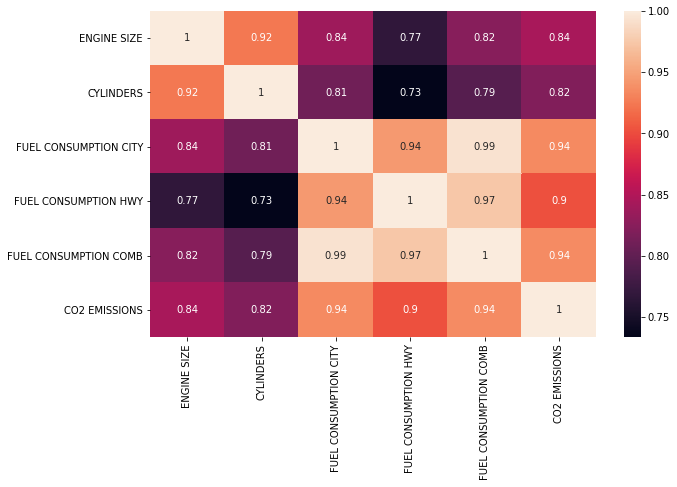

In [7]:
# calculate the correlation matrix
corr = data.corr()

# plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

### Plotting the data to see linear relationship of selected highly correlation variables

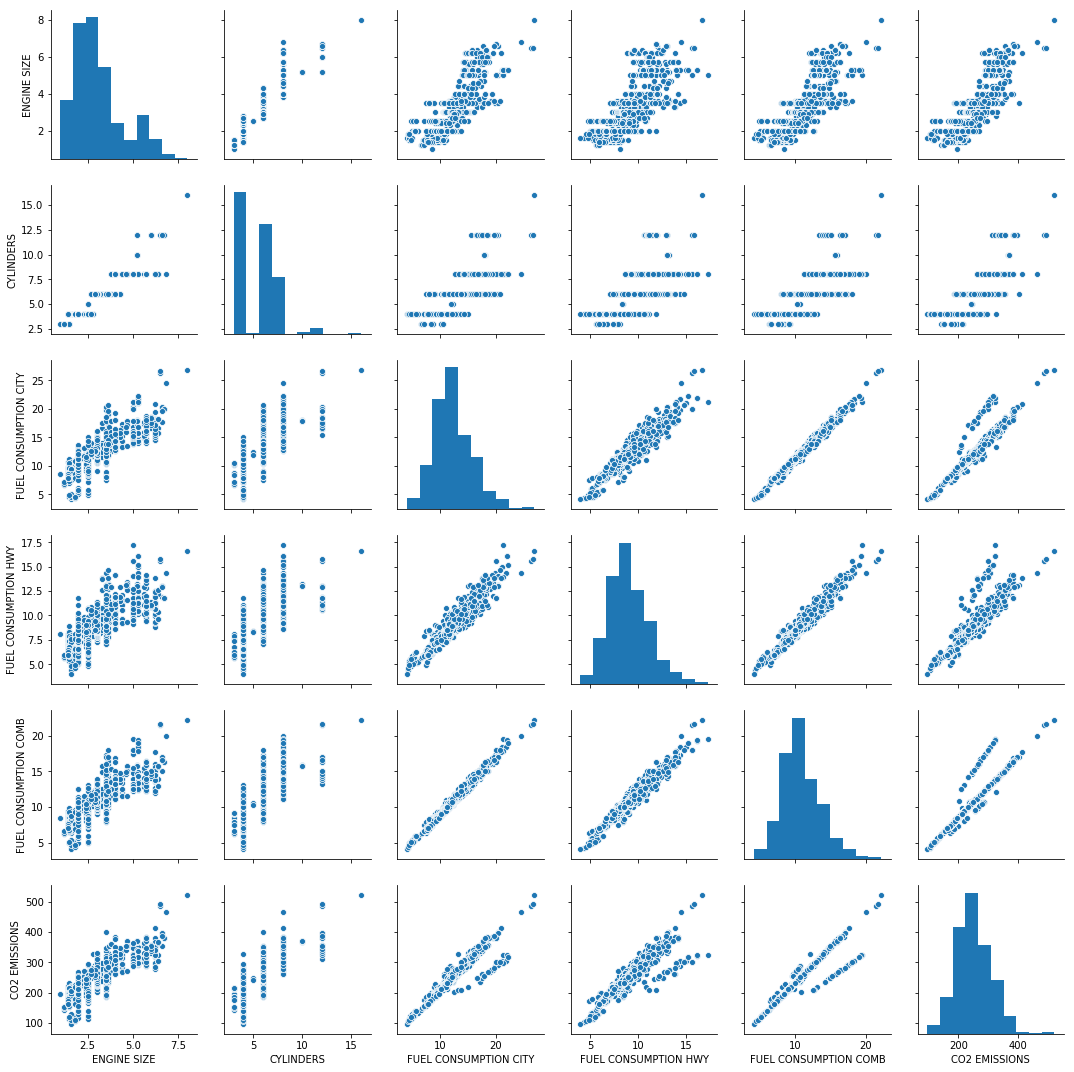

In [8]:
sns.pairplot(data)

### Splitting into Features and Labels

In [9]:
# Features
X = dataFrame[['ENGINE SIZE', 
              'CYLINDERS', 
              'FUEL CONSUMPTION CITY',
              'FUEL CONSUMPTION HWY',
              'FUEL CONSUMPTION COMB']]

# Labels
y = dataFrame['CO2 EMISSIONS']

In [10]:
X.head()

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION CITY,FUEL CONSUMPTION HWY,FUEL CONSUMPTION COMB
0,2.4,4,9.9,7.0,8.6
1,3.5,6,12.2,9.0,10.8
2,3.5,6,12.2,9.5,11.0
3,3.0,6,9.1,9.0,9.0
4,3.5,6,11.1,10.8,11.0


### Creating testing and training set

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

In [12]:
linearReg = LinearRegression().fit(X_train, y_train)

In [13]:
# Slope
print ('Slope: ', linearReg.coef_)

# y-intercept
print ('Intercept: ',linearReg.intercept_)

Slope:  [5.66126742 3.66659541 4.98982407 4.65837039 6.01480843]
Intercept:  43.571443785036195


### Evaluation

In [14]:
# Predcit for test set
predictions = linearReg.predict(X_test)

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
- Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- Root Mean Squared Error (RMSE).
- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [15]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - y_test) ** 2))
print("R2-score: %.2f" % r2_score(predictions , y_test) )

Mean absolute error: 12.05
Residual sum of squares (MSE): 378.57
R2-score: 0.88
